In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("segmentation_results.csv")

# Data Exploration

In [3]:
data.shape

(2208, 5)

In [4]:
data.head(5)

,image,fibrin_red,granulation_green,callus_blue,background
0,medetec_0242.png,0.08,5.04,17.46,77.42
1,wsnet_0542.png,0.12,5.05,7.91,86.92
2,medetec_0153.png,0.01,14.69,5.40,79.90
3,fusc_0729.png,0.18,2.10,34.04,63.68
4,wsnet_0715.png,0.00,9.19,4.20,86.61


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              2208 non-null   object 
 1   fibrin_red         2208 non-null   float64
 2   granulation_green  2208 non-null   float64
 3   callus_blue        2208 non-null   float64
 4   background         2208 non-null   float64
dtypes: float64(4), object(1)
memory usage: 86.4+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

image                2208
fibrin_red            506
granulation_green     894
callus_blue          1541
background           1552
dtype: int64

Our dataset is clean so we can skip to the data understanding phase.

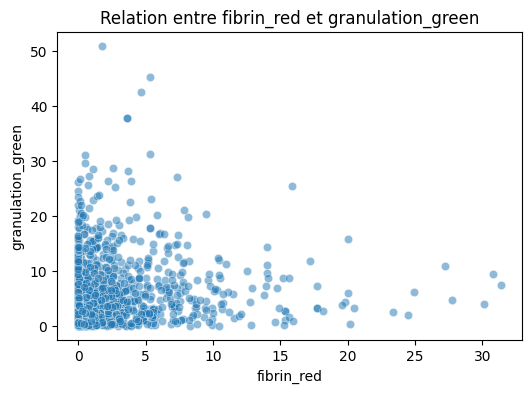

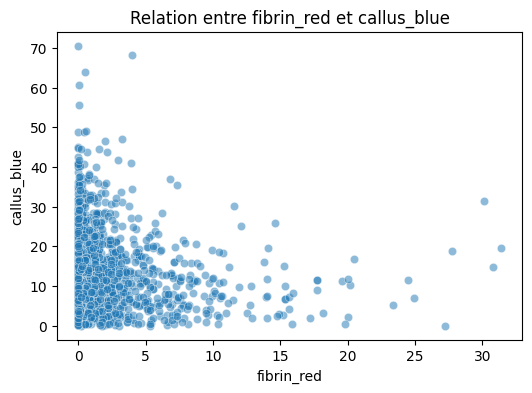

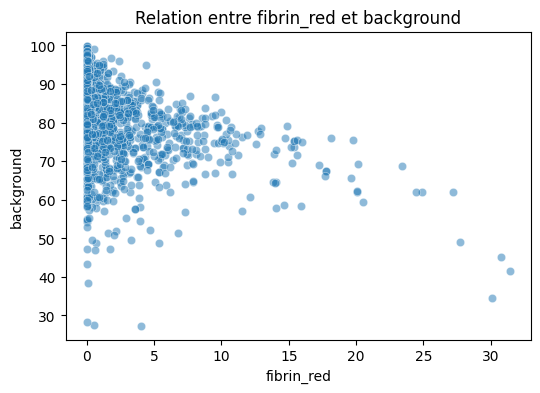

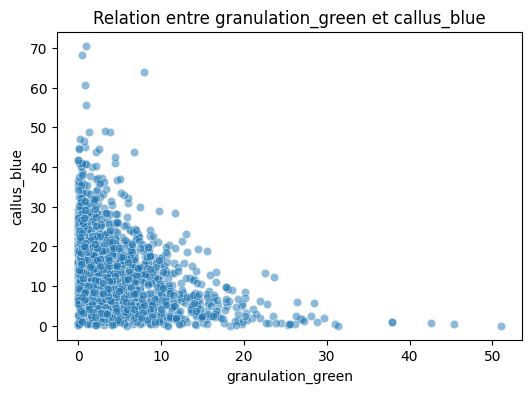

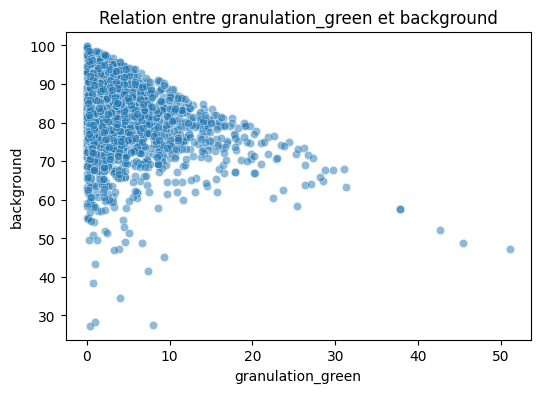

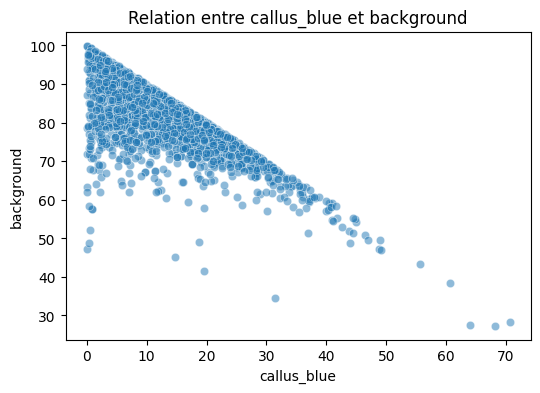

In [8]:
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

def visualiser_relations(df):
    """
    Génère des visualisations pour chaque paire de colonnes du dataset.
    - Scatter plots pour les variables numériques.
    - Boxplots pour les variables catégoriques vs numériques.
    """
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Générer des scatter plots pour les variables numériques
    for col1, col2 in combinations(numeric_cols, 2):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col1], y=df[col2], alpha=0.5)
        plt.title(f"Relation entre {col1} et {col2}")
        plt.show()

visualiser_relations(data)

Répartition des types d'assurances

In [9]:
data.isnull().sum()

image                0
fibrin_red           0
granulation_green    0
callus_blue          0
background           0
dtype: int64

In [10]:
data_clean = pd.DataFrame(data)

In [11]:
data_clean = data_clean.drop(['image'], axis=1)

In [12]:
data_clean

,fibrin_red,granulation_green,callus_blue,background
0,0.08,5.04,17.46,77.42
1,0.12,5.05,7.91,86.92
2,0.01,14.69,5.40,79.90
3,0.18,2.10,34.04,63.68
4,0.00,9.19,4.20,86.61
...,...,...,...,...
2203,0.01,0.49,23.35,76.15
2204,0.20,0.41,7.27,92.11
2205,0.04,3.69,16.53,79.74
2206,0.41,0.21,22.31,77.07


# Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialiser le MinMaxScaler
scaler = MinMaxScaler()

# Appliquer le scaling sur toutes les colonnes
encoded_data_scaled = scaler.fit_transform(data_clean)

# Convertir en DataFrame avec les mêmes colonnes
encoded_data_scaled = pd.DataFrame(encoded_data_scaled, columns=data_clean.columns)

In [14]:
encoded_data_scaled.head()

,fibrin_red,granulation_green,callus_blue,background
0,0.002549,0.098765,0.247379,0.689636
1,0.003823,0.098961,0.112071,0.820562
2,0.000319,0.287870,0.076509,0.723815
3,0.005734,0.041152,0.482290,0.500276
4,0.000000,0.180090,0.059507,0.816290


# Unsupervised Learning

In [15]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.model_selection import GridSearchCV

In [16]:
data_features=pd.DataFrame(encoded_data_scaled)

In [17]:
data_features.head()

,fibrin_red,granulation_green,callus_blue,background
0,0.002549,0.098765,0.247379,0.689636
1,0.003823,0.098961,0.112071,0.820562
2,0.000319,0.287870,0.076509,0.723815
3,0.005734,0.041152,0.482290,0.500276
4,0.000000,0.180090,0.059507,0.816290


# Clustering avec K-Means

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

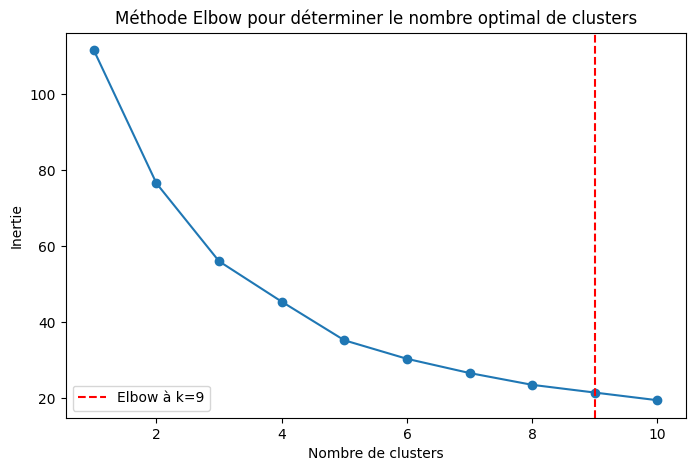

In [19]:
# Calcul de l'inertie pour différents nombres de clusters
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_features)
    inertia.append(kmeans.inertia_)

# Trouver la plus grande chute entre deux inerties successives
inertia_diff = np.diff(inertia)  # Différence entre chaque inertie successive
elbow_point = np.argmax(inertia_diff) + 1  # Ajouter 1 car np.diff réduit la longueur de 1

# Tracer le graphique
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Méthode Elbow pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")

# Ajouter la ligne verticale au niveau de la plus grande chute
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Elbow à k={elbow_point}')

# Afficher le graphique
plt.legend()
plt.show()


In [20]:
inertias = []
for k in range(2, 10):
    kmeans = KMeans(random_state=0, n_clusters=k)
    kmeans.fit(data_features)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(12, 4))
plt.show()

C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

<Figure size 1200x400 with 0 Axes>

In [21]:
from kneed import KneeLocator
k = KneeLocator(range(2, 10), inertias, curve="convex", direction="decreasing")
k.elbow

5

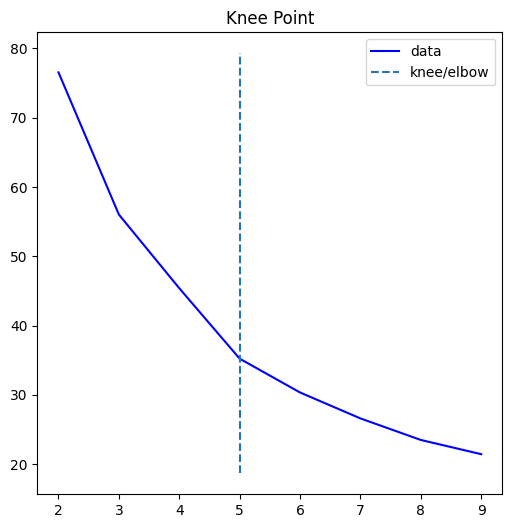

In [22]:
k.plot_knee()
plt.show()

In [23]:
# !pip install yellowbrick

C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

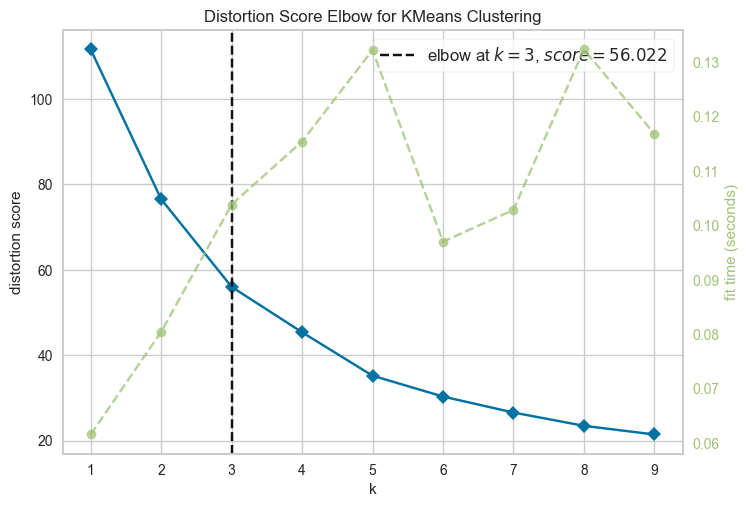

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(data_features)   # Fit the data to the visualizer
visualizer.show()   

On a utilisé deux moyens pour déterminer le nombre optimal de clusters:
- le KneePoint on a donné 4
- la méthode Elbow a donné 9
- la méthode Distortion Score a donné 2

On va essayer les trois.

# n_clusters = 4

In [25]:
n_clusters = 3

In [26]:
# Initialisation et ajustement du modèle K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_features)

C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [27]:
data_features['Cluster_KMeans_4'] = kmeans.labels_

In [28]:
data_features

,fibrin_red,granulation_green,callus_blue,background,Cluster_KMeans_4
0,0.002549,0.098765,0.247379,0.689636,1
1,0.003823,0.098961,0.112071,0.820562,2
2,0.000319,0.287870,0.076509,0.723815,0
3,0.005734,0.041152,0.482290,0.500276,1
4,0.000000,0.180090,0.059507,0.816290,2
...,...,...,...,...,...
2203,0.000319,0.009602,0.330830,0.672133,1
2204,0.006371,0.008034,0.103004,0.892089,2
2205,0.001274,0.072310,0.234202,0.721610,1
2206,0.013061,0.004115,0.316095,0.684813,1


In [32]:
silhouette_avg = silhouette_score(data_features.iloc[:, :-1], kmeans.labels_)
print(f"\nScore de silhouette pour K-Means : {silhouette_avg}")


Score de silhouette pour K-Means : 0.3846051562718814


In [33]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fibrin_red         2208 non-null   float64
 1   granulation_green  2208 non-null   float64
 2   callus_blue        2208 non-null   float64
 3   background         2208 non-null   float64
 4   Cluster_KMeans_4   2208 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 77.8 KB


In [34]:
data_features = data_features.drop('Cluster_KMeans_4', axis=1)

In [35]:
data_features.columns

Index(['fibrin_red', 'granulation_green', 'callus_blue', 'background'], dtype='object')

# n_clusters = 9

In [44]:
n_clusters = 9

In [45]:
# Initialisation et ajustement du modèle K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_features)

C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=9, random_state=42)

In [46]:
# Initialisation et ajustement du modèle K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_features)
data_features['Cluster_KMeans_9'] = kmeans.labels_
silhouette_avg = silhouette_score(data_features, kmeans.labels_)
print(f"\nScore de silhouette pour K-Means : {silhouette_avg}")

C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Score de silhouette pour K-Means : 0.8941638703689364


In [47]:
silhouette_avg = silhouette_score(data_features, kmeans.labels_)
print(f"\nScore de silhouette pour K-Means : {silhouette_avg}")


Score de silhouette pour K-Means : 0.8941638703689364


Préparation de la description des clusters pour interprétation

In [65]:
# Regrouper les données par cluster et obtenir des statistiques descriptives
cluster_descriptions = data_features.groupby('Cluster_KMeans_9').describe()

# Arrondir les valeurs pour un affichage plus lisible
cluster_descriptions = cluster_descriptions.round(3).transpose()

In [66]:
data_features = data_features.drop('Cluster_KMeans_9', axis=1)

In [25]:
data_features

,fibrin_red,granulation_green,callus_blue,background
0,0.002549,0.098765,0.247379,0.689636
1,0.003823,0.098961,0.112071,0.820562
2,0.000319,0.287870,0.076509,0.723815
3,0.005734,0.041152,0.482290,0.500276
4,0.000000,0.180090,0.059507,0.816290
...,...,...,...,...
2203,0.000319,0.009602,0.330830,0.672133
2204,0.006371,0.008034,0.103004,0.892089
2205,0.001274,0.072310,0.234202,0.721610
2206,0.013061,0.004115,0.316095,0.684813


# n_clusters = 2

In [26]:
#Cluster K-means
model=KMeans(n_clusters=3)
#adapter le modèle de données
model.fit(data_features)

C:\Users\anasn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [27]:
data_features['Cluster_KMeans_3']=model.labels_

In [28]:
silhouette_avg = silhouette_score(data_features, model.labels_)
print(f"\nScore de silhouette pour K-Means : {silhouette_avg}")


Score de silhouette pour K-Means : 0.8318061794971714


Clusters uniques : [2 1 0]


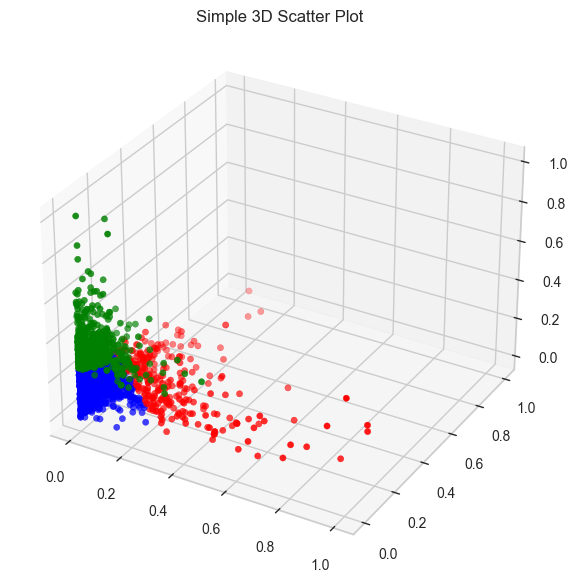

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Vérifier les valeurs uniques des clusters
print("Clusters uniques :", data_features['Cluster_KMeans_3'].unique())

# Définir un colormap avec 4 couleurs (0,1,2,3)
colormap = {0: "red", 1: "blue", 2: "green"}

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

# Vérifier si toutes les valeurs de Cluster_KMeans existent dans colormap
assert all(label in colormap for label in data_features['Cluster_KMeans_3'].unique()), "Colormap is missing a cluster label!"

# Créer le graphique de dispersion 3D
scatter = ax.scatter3D(
    data_features['fibrin_red'], 
    data_features['granulation_green'], 
    data_features['callus_blue'], 
    c=[colormap[label] for label in data_features['Cluster_KMeans_3']]
)

plt.title("Simple 3D Scatter Plot")
plt.show()


In [71]:
#!pip install kneed

In [37]:
data_features.head(2)

,fibrin_red,granulation_green,callus_blue,background,Cluster_KMeans_3
0,0.08,5.04,17.46,77.42,0
1,0.12,5.05,7.91,86.92,2


In [31]:
data_features = data_features.drop('Cluster_KMeans_3', axis=1)

In [32]:
data_features.columns

Index(['fibrin_red', 'granulation_green', 'callus_blue', 'background'], dtype='object')

# Clustering Hiérarchique

In [115]:
data_clean = data_clean.drop('Cluster_Hierarchical', axis=1)

In [42]:
sampled_data=pd.DataFrame(data_features)

In [43]:
sampled_data.head(5)

,fibrin_red,granulation_green,callus_blue,background
0,0.002549,0.098765,0.247379,0.689636
1,0.003823,0.098961,0.112071,0.820562
2,0.000319,0.287870,0.076509,0.723815
3,0.005734,0.041152,0.482290,0.500276
4,0.000000,0.180090,0.059507,0.816290


In [44]:
# Calcul des liens hiérarchiques
linkage_matrix = linkage(sampled_data, method='ward')

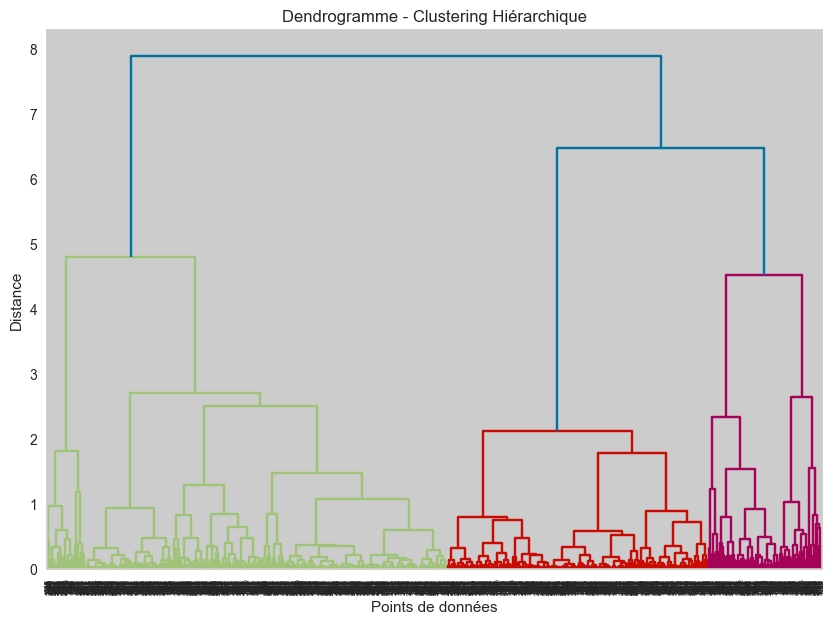

In [45]:
# Visualisation du dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrogramme - Clustering Hiérarchique")
plt.xlabel("Points de données")
plt.ylabel("Distance")
plt.show()

In [46]:
# Découpage en clusters
num_clusters = 5
sampled_data['Cluster_Hierarchical'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [47]:
# Calcul du score de silhouette pour le clustering hiérarchique
silhouette_avg_hierarchical = silhouette_score(sampled_data, sampled_data['Cluster_Hierarchical'])
print(f"\nScore de silhouette pour le clustering hiérarchique : {silhouette_avg_hierarchical}")


Score de silhouette pour le clustering hiérarchique : 0.8549041830114277


In [40]:
sampled_data = sampled_data.drop('Cluster_Hierarchical', axis=1)

In [48]:
sampled_data

,fibrin_red,granulation_green,callus_blue,background,Cluster_Hierarchical
0,0.002549,0.098765,0.247379,0.689636,2
1,0.003823,0.098961,0.112071,0.820562,3
2,0.000319,0.287870,0.076509,0.723815,4
3,0.005734,0.041152,0.482290,0.500276,1
4,0.000000,0.180090,0.059507,0.816290,4
...,...,...,...,...,...
2203,0.000319,0.009602,0.330830,0.672133,2
2204,0.006371,0.008034,0.103004,0.892089,3
2205,0.001274,0.072310,0.234202,0.721610,2
2206,0.013061,0.004115,0.316095,0.684813,2


In [138]:
data_features

,fibrin_red,granulation_green,callus_blue,background
0,0.002549,0.098765,0.247379,0.689636
1,0.003823,0.098961,0.112071,0.820562
2,0.000319,0.287870,0.076509,0.723815
3,0.005734,0.041152,0.482290,0.500276
4,0.000000,0.180090,0.059507,0.816290
...,...,...,...,...
2203,0.000319,0.009602,0.330830,0.672133
2204,0.006371,0.008034,0.103004,0.892089
2205,0.001274,0.072310,0.234202,0.721610
2206,0.013061,0.004115,0.316095,0.684813


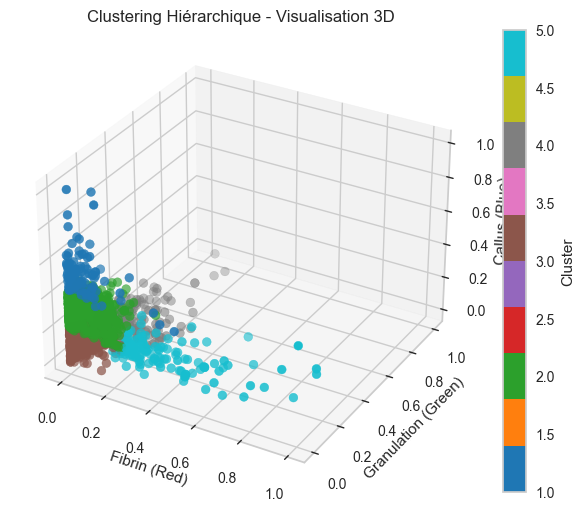

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    sampled_data['fibrin_red'],
    sampled_data['granulation_green'],
    sampled_data['callus_blue'],
    c=sampled_data['Cluster_Hierarchical'],
    cmap='tab10',
    s=40
)

ax.set_xlabel('Fibrin (Red)')
ax.set_ylabel('Granulation (Green)')
ax.set_zlabel('Callus (Blue)')
ax.set_title('Clustering Hiérarchique - Visualisation 3D')

plt.colorbar(scatter, label='Cluster')
plt.show()


In [54]:
sampled_data

,fibrin_red,granulation_green,callus_blue,background,Cluster_Hierarchical
0,0.002549,0.098765,0.247379,0.689636,2
1,0.003823,0.098961,0.112071,0.820562,3
2,0.000319,0.287870,0.076509,0.723815,4
3,0.005734,0.041152,0.482290,0.500276,1
4,0.000000,0.180090,0.059507,0.816290,4
...,...,...,...,...,...
2203,0.000319,0.009602,0.330830,0.672133,2
2204,0.006371,0.008034,0.103004,0.892089,3
2205,0.001274,0.072310,0.234202,0.721610,2
2206,0.013061,0.004115,0.316095,0.684813,2


In [50]:
!pip install plotly

You should consider upgrading via the 'C:\Users\anasn\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [52]:
import sys
!{sys.executable} -m pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 1.9 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.9 MB 2.1 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.9 MB 2.4 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.9 MB 2.0 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.9 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.9 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.9 MB 2.1 MB/s eta 0:00:04
   ---------------- ----------------------- 4.2/9.9 MB 2.2 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.9 MB 2.3 MB/s eta 0:00:03
   ---------------------- ----------------- 5.5/9.9 MB 2.4 MB/s eta 0:00:02
   ------------------------- ----


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\anasn\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [57]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [61]:
import plotly.io as pio
pio.renderers.default = "browser"

In [63]:
fig.show()

C:\Users\anasn\AppData\Local\Temp\ipykernel_37136\89474557.py:1: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [64]:
import plotly.express as px

fig = px.scatter_3d(
    sampled_data,
    x='fibrin_red',
    y='granulation_green',
    z='callus_blue',
    color='Cluster_Hierarchical',
    title='Clustering Hiérarchique - Visualisation 3D',
    opacity=0.8
)

fig.update_traces(marker=dict(size=5))
fig.show()


In [65]:
from sklearn.metrics import silhouette_score

X = sampled_data[['fibrin_red', 'granulation_green', 'callus_blue']]
labels = sampled_data['Cluster_Hierarchical']

sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.33772355167293927


In [66]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_score)


Davies-Bouldin Index: 0.8895974448211843


In [67]:
sampled_data

,fibrin_red,granulation_green,callus_blue,background,Cluster_Hierarchical
0,0.002549,0.098765,0.247379,0.689636,2
1,0.003823,0.098961,0.112071,0.820562,3
2,0.000319,0.287870,0.076509,0.723815,4
3,0.005734,0.041152,0.482290,0.500276,1
4,0.000000,0.180090,0.059507,0.816290,4
...,...,...,...,...,...
2203,0.000319,0.009602,0.330830,0.672133,2
2204,0.006371,0.008034,0.103004,0.892089,3
2205,0.001274,0.072310,0.234202,0.721610,2
2206,0.013061,0.004115,0.316095,0.684813,2


In [68]:
# Regrouper les données par cluster et obtenir des statistiques descriptives
cluster_descriptions = sampled_data.groupby('Cluster_Hierarchical').describe()

# Arrondir les valeurs pour un affichage plus lisible
cluster_descriptions = cluster_descriptions.round(3).transpose()

## meilleur modèle : Kmeans Clustering , n_clusters = 9

In [69]:
print(cluster_descriptions)

Cluster_Hierarchical           1         2        3        4        5
fibrin_red        count  107.000  1034.000  745.000  200.000  122.000
                  mean     0.047     0.024    0.016    0.071    0.370
                  std      0.078     0.043    0.029    0.076    0.184
                  min      0.000     0.000    0.000    0.000    0.148
                  25%      0.002     0.000    0.000    0.005    0.241
                  50%      0.017     0.005    0.002    0.043    0.313
                  75%      0.063     0.025    0.016    0.115    0.448
                  max      0.466     0.251    0.163    0.303    1.000
granulation_green count  107.000  1034.000  745.000  200.000  122.000
                  mean     0.037     0.054    0.057    0.311    0.106
                  std      0.041     0.059    0.049    0.133    0.073
                  min      0.000     0.000    0.000    0.137    0.000
                  25%      0.009     0.009    0.016    0.218    0.059
                  50